## Analyis of yeast glycolytic oscillations
<br>Bier model of yeast glycolitic oscillations</br>
Inspired by [Dynamical modeling in system biology @ coursera.org](https://www.coursera.org/lecture/dynamical-modeling/lecture-9-introduction-to-dynamical-systems-part-4-PjWdN)


In [2]:

from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.style.use('seaborn')

In [3]:

def pend(y, t, k, kp, km, vin):
    atp, glucose = y
    dGdt = 2 * k * glucose * atp - (kp * atp / (atp + km))
    dATPdt = vin - (k * glucose * atp)
    dydt = [dGdt, dATPdt]
    return dydt

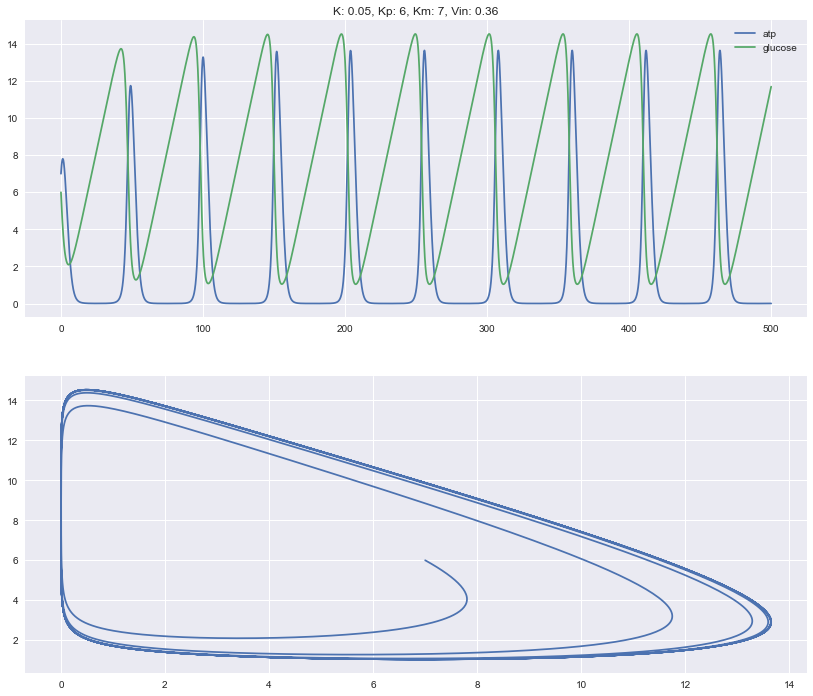

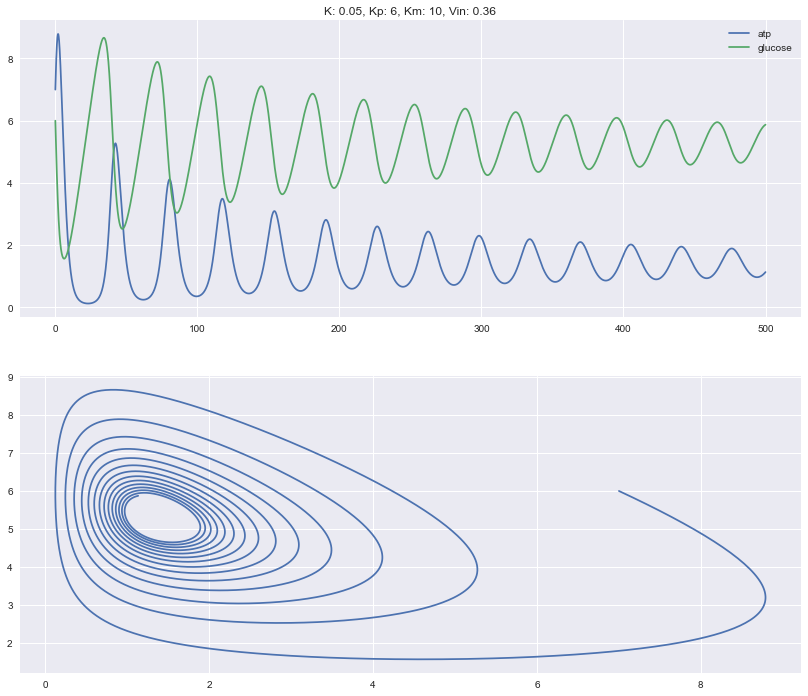

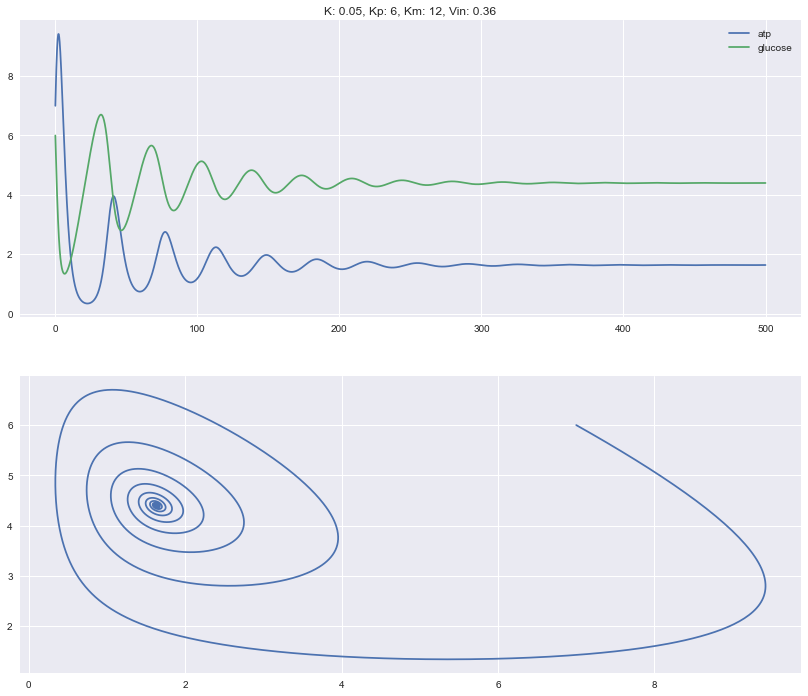

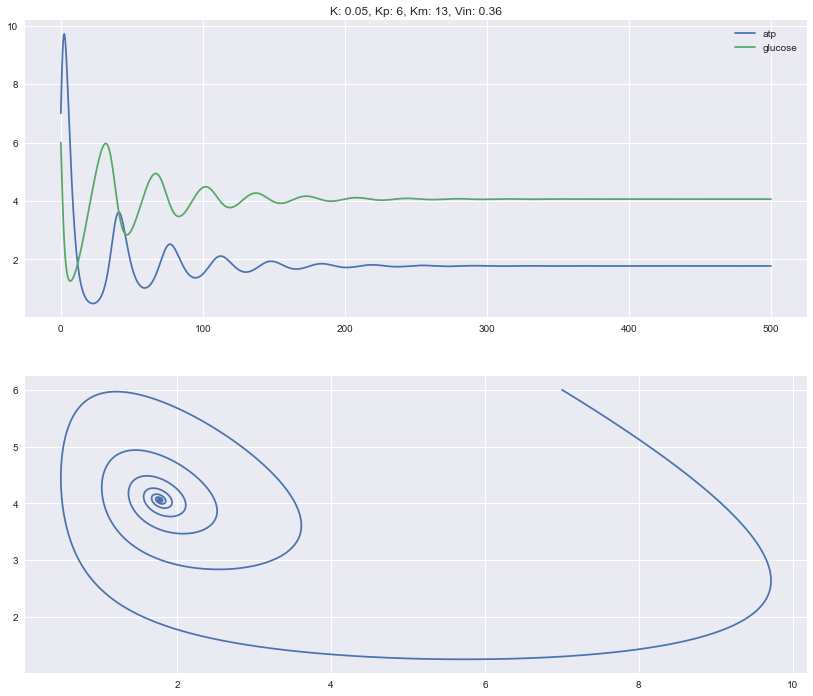

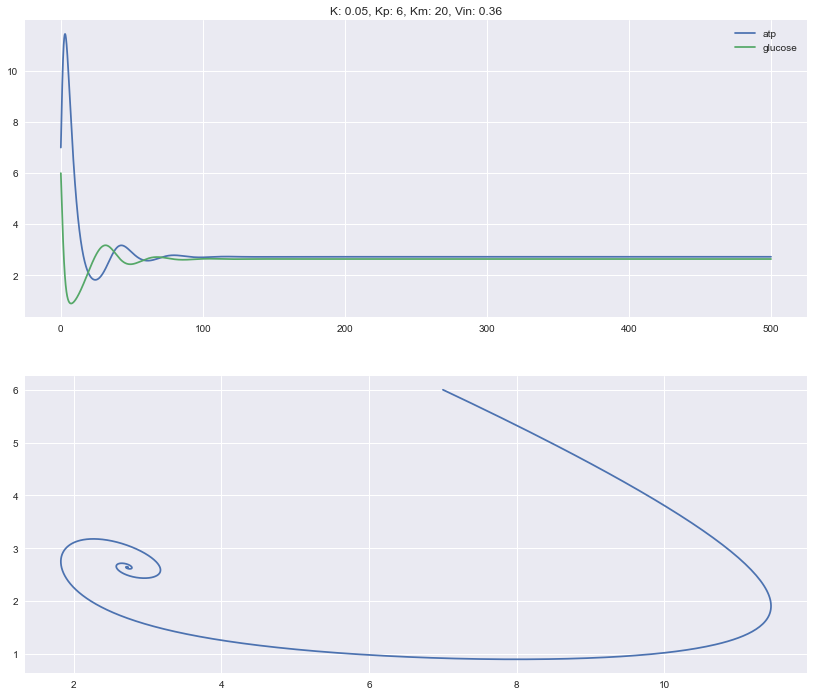

In [5]:
t = np.linspace(0, 500, 10000)

# initial points
y0 = [7, 6]

k, kp, km, vin = 0.05, 6, 13, 0.36

for km in [7, 10, 12, 13, 20]:
    sol = odeint(pend, y0, t, args=(k, kp, km, vin))

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(14, 12))
    f
    ax1.plot(t, sol[:, 0], label='atp')
    ax1.plot(t, sol[:, 1], label='glucose')
    ax2.plot(sol[:, 0], sol[:, 1])
    ax1.set_title(f'K: {k}, Kp: {kp}, Km: {km}, Vin: {vin}')
    ax1.legend()
    plt.show()